In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('BlackFriday.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


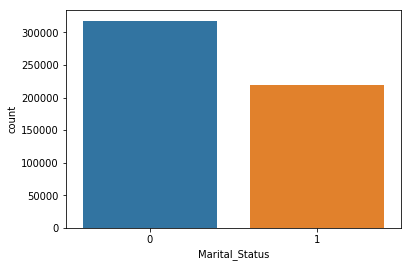

In [6]:
sns.countplot(x='Marital_Status',data=data)

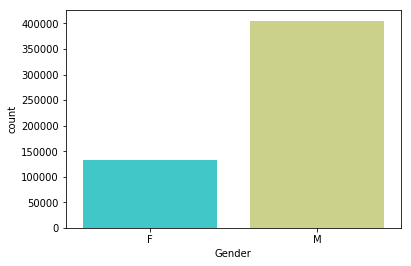

In [7]:
sns.countplot(x='Gender',data=data,palette='rainbow')

In [ ]:
#Males are dominant

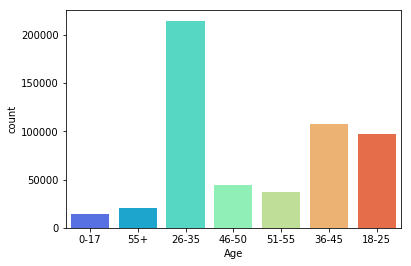

In [8]:
sns.countplot(x='Age',data=data,palette='rainbow')

In [9]:
#customers are mostly between 26-35 years old. 

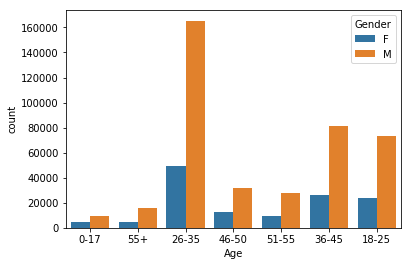

In [10]:
sns.countplot(x='Age',data=data,hue='Gender')

In [11]:
#As can be seen from the figure, more males spent in sales than females

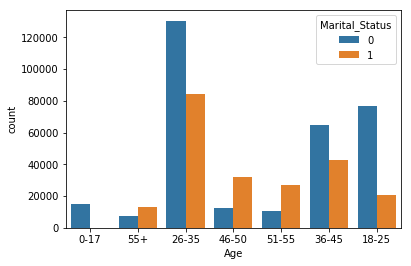

In [12]:
sns.countplot(x='Age',data=data,hue='Marital_Status')

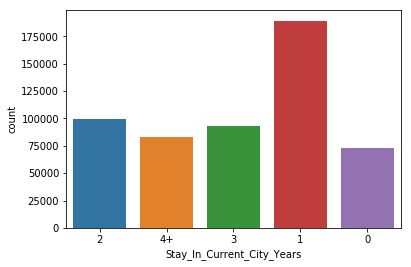

In [13]:
sns.countplot(data['Stay_In_Current_City_Years'])

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


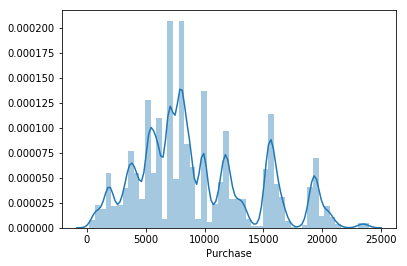

In [14]:
sns.distplot(data['Purchase'])

In [15]:
#Purchase data doest not follow normal distribution

In [16]:
data.fillna(value=0,inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


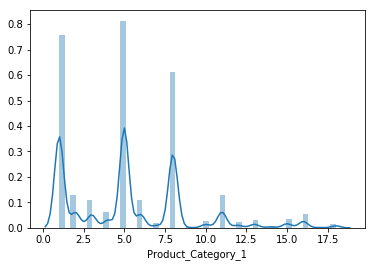

In [18]:
sns.distplot(data['Product_Category_1'])

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


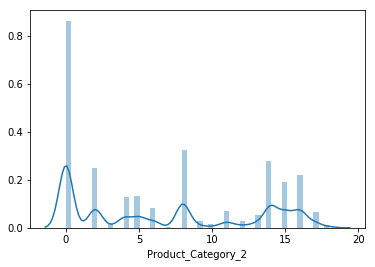

In [19]:
sns.distplot(data['Product_Category_2'])

C:\Users\nsever\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


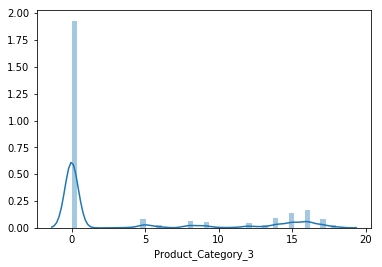

In [20]:
sns.distplot(data['Product_Category_3'])

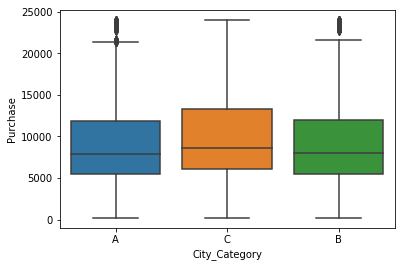

In [21]:
sns.boxplot(x='City_Category',y='Purchase',data=data)

In [ ]:
#Avarage Purchase is quite similar for different city categories

In [22]:
newdata=pd.get_dummies(data['City_Category'])

In [23]:
#female =0, male=1
def gender(gender):
    if gender=='F':
        return 0
    if gender=='M':
        return 1

In [131]:
#creating dummy for gender

In [24]:
def city_year(year):
    if year=='0':
        return 0
    if year=='1':
        return 1
    if year=='2':
        return 2
    if year=='3':
        return 3
    if year=='4+':
        return 4

In [130]:
#converting numbers

In [25]:
data['Gender']=data['Gender'].apply(gender)

In [26]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].apply(city_year)

In [27]:
agedata=pd.get_dummies(data['Age'])

In [28]:
df=pd.concat([data,agedata,newdata],axis=1)

In [132]:
#concating dummy datas with initial data

In [29]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,...,1,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,...,1,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,...,1,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,...,1,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,1,55+,16,C,4,0,8,0.0,...,0,0,0,0,0,0,1,0,0,1


In [30]:
df.drop(['User_ID','Product_ID','Age','City_Category'],axis=1,inplace=True)

In [ ]:
#I will not be using User ID and Product ID for analysis. I will also drop Age and City_Category colums because i created dummies. 

In [31]:
df.head()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C
0,0,10,2,0,3,0.0,0.0,8370,1,0,0,0,0,0,0,1,0,0
1,0,10,2,0,1,6.0,14.0,15200,1,0,0,0,0,0,0,1,0,0
2,0,10,2,0,12,0.0,0.0,1422,1,0,0,0,0,0,0,1,0,0
3,0,10,2,0,12,14.0,0.0,1057,1,0,0,0,0,0,0,1,0,0
4,1,16,4,0,8,0.0,0.0,7969,0,0,0,0,0,0,1,0,0,1


# Clustering Customers with K-means

In [32]:
from sklearn.cluster import KMeans

In [33]:
#We wil cluster customer types. I will use first elbow method to detect how many customer clusters detected in the data.

In [34]:
#Elbow Method
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

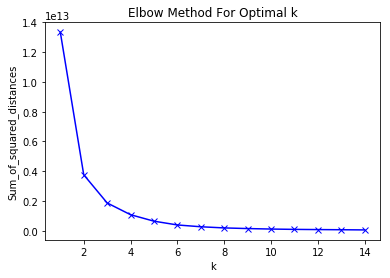

In [35]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
#From the elbow methdos,  it is clear to see that there are 3 customer clusters in our data. 

In [121]:
kmeans=KMeans(n_clusters=3)

In [122]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [123]:
kmeans.cluster_centers_

array([[7.43393897e-01, 8.06044728e+00, 1.85804743e+00, 4.11590807e-01,
        5.13594900e+00, 6.62160889e+00, 3.54660978e+00, 9.04380429e+03,
        2.65787568e-02, 1.77558443e-01, 3.96116874e-01, 2.00290483e-01,
        8.45130064e-02, 7.27868515e-02, 4.21555862e-02, 2.68949633e-01,
        4.18611462e-01, 3.12438906e-01],
       [7.99334272e-01, 8.31270752e+00, 1.87227085e+00, 4.06580139e-01,
        3.47353859e+00, 7.27218533e+00, 6.88604655e+00, 1.70547654e+04,
        2.62685716e-02, 1.80308213e-01, 3.97692591e-01, 2.04120133e-01,
        8.00633867e-02, 7.37750277e-02, 3.77720763e-02, 2.35394238e-01,
        4.05029010e-01, 3.59576752e-01],
       [7.37818941e-01, 7.95105237e+00, 1.85238429e+00, 4.06131888e-01,
        6.85106807e+00, 6.68314757e+00, 2.19725768e+00, 4.21651808e+03,
        2.93311437e-02, 1.88756596e-01, 4.05528118e-01, 1.96490889e-01,
        8.22455412e-02, 6.29550916e-02, 3.46926207e-02, 2.93456341e-01,
        4.37189813e-01, 2.69353845e-01]])

In [124]:
kmeans.labels_

array([0, 1, 2, ..., 0, 0, 0])

In [125]:
result=pd.DataFrame(kmeans.labels_,columns=['Customers'])

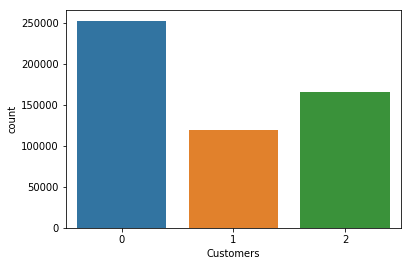

In [126]:
sns.countplot(result['Customers'])

In [43]:
#3 types of customer numbers

In [127]:
final_data=pd.concat([data,result],axis=1)

In [128]:
final_data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Customers
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370,0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422,2
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057,2
4,1000002,P00285442,1,55+,16,C,4,0,8,0.0,0.0,7969,0
5,1000003,P00193542,1,26-35,15,A,3,0,1,2.0,0.0,15227,1
6,1000004,P00184942,1,46-50,7,B,2,1,1,8.0,17.0,19215,1
7,1000004,P00346142,1,46-50,7,B,2,1,1,15.0,0.0,15854,1
8,1000004,P0097242,1,46-50,7,B,2,1,1,16.0,0.0,15686,1
9,1000005,P00274942,1,26-35,20,A,1,1,8,0.0,0.0,7871,0


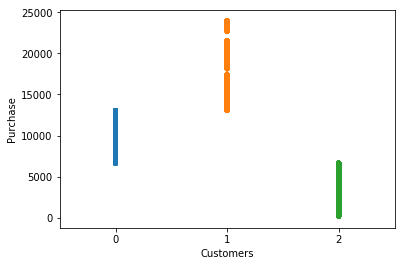

In [129]:
sns.stripplot(x='Customers',y='Purchase',data=final_data)

In [96]:
#We can clearly indetify different customers' purchase ranges.